In [1]:
import pandas as pd
from ema_workbench.analysis import prim
import os
import tarfile

# File paths (Adjust these if the directory structure has changed)
tar_gz_path = r'C:\Users\matth\OneDrive\EPA\Afstuderen\Tweede_midterm\data\results.tar.gz'
extract_dir = r'C:\Users\matth\OneDrive\EPA\Afstuderen\Tweede_midterm\data\results_extracted'

# Step 1: Extract if needed
os.makedirs(extract_dir, exist_ok=True)
with tarfile.open(tar_gz_path, 'r:gz') as tar:
    tar.extractall(path=extract_dir)

# Load the experiments and the outcome data
experiments_path = os.path.join(extract_dir, 'experiments.csv')
df_experiments = pd.read_csv(experiments_path)

# Outcome file (Intention to stay in the profession)
outcome_file = 'Job satisfaction.csv'
outcome_path = os.path.join(extract_dir, outcome_file)
df_outcome = pd.read_csv(outcome_path)

# Ensure that the number of scenarios in the outcome matches the number of scenarios in the experiments
if df_outcome.shape[0] != len(df_experiments):
    raise ValueError(f"Outcome data has {df_outcome.shape[0]} rows, but expected {len(df_experiments)}.")

# Step 2: Prepare 'x' (input data)
# 'x' is the input data from experiments.csv
x = df_experiments.drop(columns=['scenario'])  # drop 'scenario' if it's not an input feature

# Step 3: Prepare 'y' (outcome data)
# 'y' is the outcome of 'Intention to stay in the profession' under the threshold of 0.8
y = df_outcome.iloc[:, 0]  # Assuming the first column of df_outcome is the outcome
y = y > 0.7  # Apply the threshold condition (True if the value is less than 0.8, else False)

# Step 4: Run PRIM algorithm
prim_alg = prim.Prim(x, y, threshold=0.7)
box1 = prim_alg.find_box()

# Step 5: View the result
print("PRIM Results:", box1)

C:\Programs\Anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:57: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
C:\Programs\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Programs\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Programs\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Programs\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in 

PRIM Results: <ema_workbench.analysis.prim.PrimBox object at 0x0000016992D2CE10>


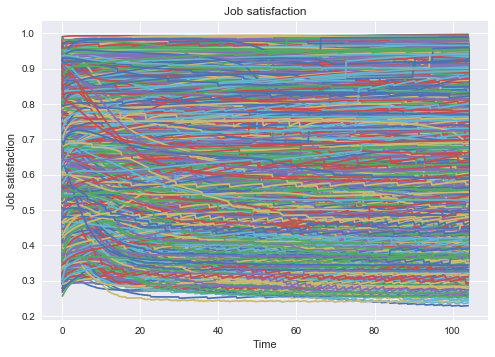

In [2]:
#Behaviour over time of Job Satisfaction
from ema_workbench.analysis.plotting import lines
from ema_workbench import load_results
import matplotlib.pyplot as plt
import os


plt.style.use('seaborn')
# Load your results
results = load_results('./data/results.tar.gz')
experiments, outcomes = results

# Plot a specific outcome
lines(experiments, outcomes, outcomes_to_show='Job satisfaction')


output_dir = './simulation_results/figures'

plt.savefig(os.path.join(output_dir, 'job_satisfaction_BOT.png'), dpi=300, bbox_inches='tight')

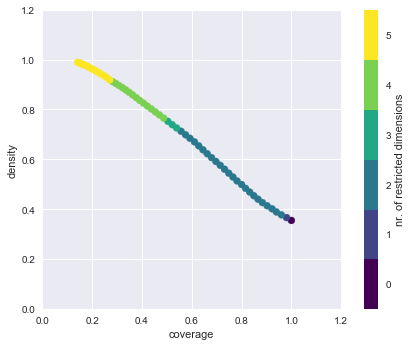

In [2]:
import os
import matplotlib.pyplot as plt

# Define your directory and filename
save_dir = 'simulation_results/figures'  # or something like 'outputs/prim_figures'
os.makedirs(save_dir, exist_ok=True)  # Create it if it doesn't exist

filename = os.path.join(save_dir, 'tradeoff_plot_job_satisfaction_07.png')

plt.style.use('seaborn')
# Save the figure
fig = box1.show_tradeoff()
fig.savefig(filename, dpi=300, bbox_inches='tight')

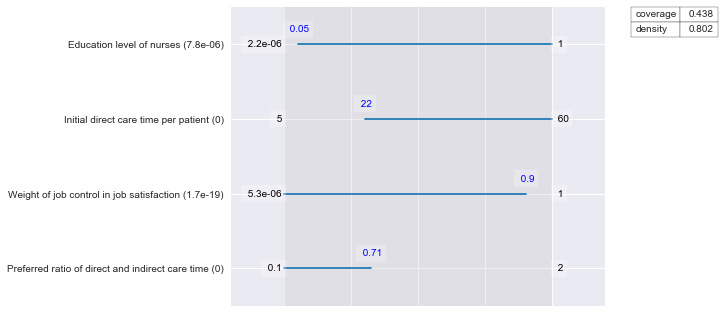

In [3]:
# Generate and save the plot
plt.style.use('seaborn')
fig = box1.inspect(32, style="graph")
filename = os.path.join(save_dir, 'job_satisfaction_07_box28_inspect_plot.png')
fig.savefig(filename, dpi=300, bbox_inches='tight')
